<a href="https://colab.research.google.com/github/Muhammad-Farhan-A/Kelompok-2-APM-B/blob/main/Prak2_DecisionTree_C4.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#mengimport library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [8]:
#pemanggilan dataset serta menampilkannya
data = pd.read_csv('Customertravel.csv')
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [9]:
#mengubah tipe data string menjadi numerik
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['FrequentFlyer'] = enc.fit_transform(data['FrequentFlyer'].values)
data['AnnualIncomeClass'] = enc.fit_transform(data['AnnualIncomeClass'].values)
data['AccountSyncedToSocialMedia'] = enc.fit_transform(data['AccountSyncedToSocialMedia'].values)
data['BookedHotelOrNot'] = enc.fit_transform(data['BookedHotelOrNot'].values)
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [10]:
#menentukan label dan memisahkannya
atr_data = data.drop(columns='Target')
atr_data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,0,2,6,0,1
1,34,2,1,5,1,0
2,37,0,2,3,1,0
3,30,0,2,2,0,0
4,30,0,1,1,0,0


In [11]:
#menampilkan data label
cls_data = data['Target']
cls_data.head()

0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

In [13]:
#membagi dataset menjadi training set dan testing set serta menerapkan algoritma decision tree
xtrain, xtest, ytrain, ytest = train_test_split(atr_data, cls_data, test_size=0.2, random_state=1)

In [14]:
#membuat objek decision tree classifier dan melakukan prediksi
clf = DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0, max_leaf_nodes=None, min_impurity_decrease=0)
clf = clf.fit(atr_data, cls_data)
prediction = clf.predict(xtest)

In [15]:
#menghitung tingkat akurasi dan menampilkannya
cm = confusion_matrix(ytest, prediction)
print("Confusion Matrix")
print(cm)
akurasi = classification_report(ytest, prediction)
print("Akurasi : ", akurasi)
akurasi = accuracy_score(ytest, prediction)
print("Tingkat akurasi : ", akurasi)

Confusion Matrix
[[155   1]
 [  5  30]]
Akurasi :                precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.97      0.86      0.91        35

    accuracy                           0.97       191
   macro avg       0.97      0.93      0.95       191
weighted avg       0.97      0.97      0.97       191

Tingkat akurasi :  0.9685863874345549


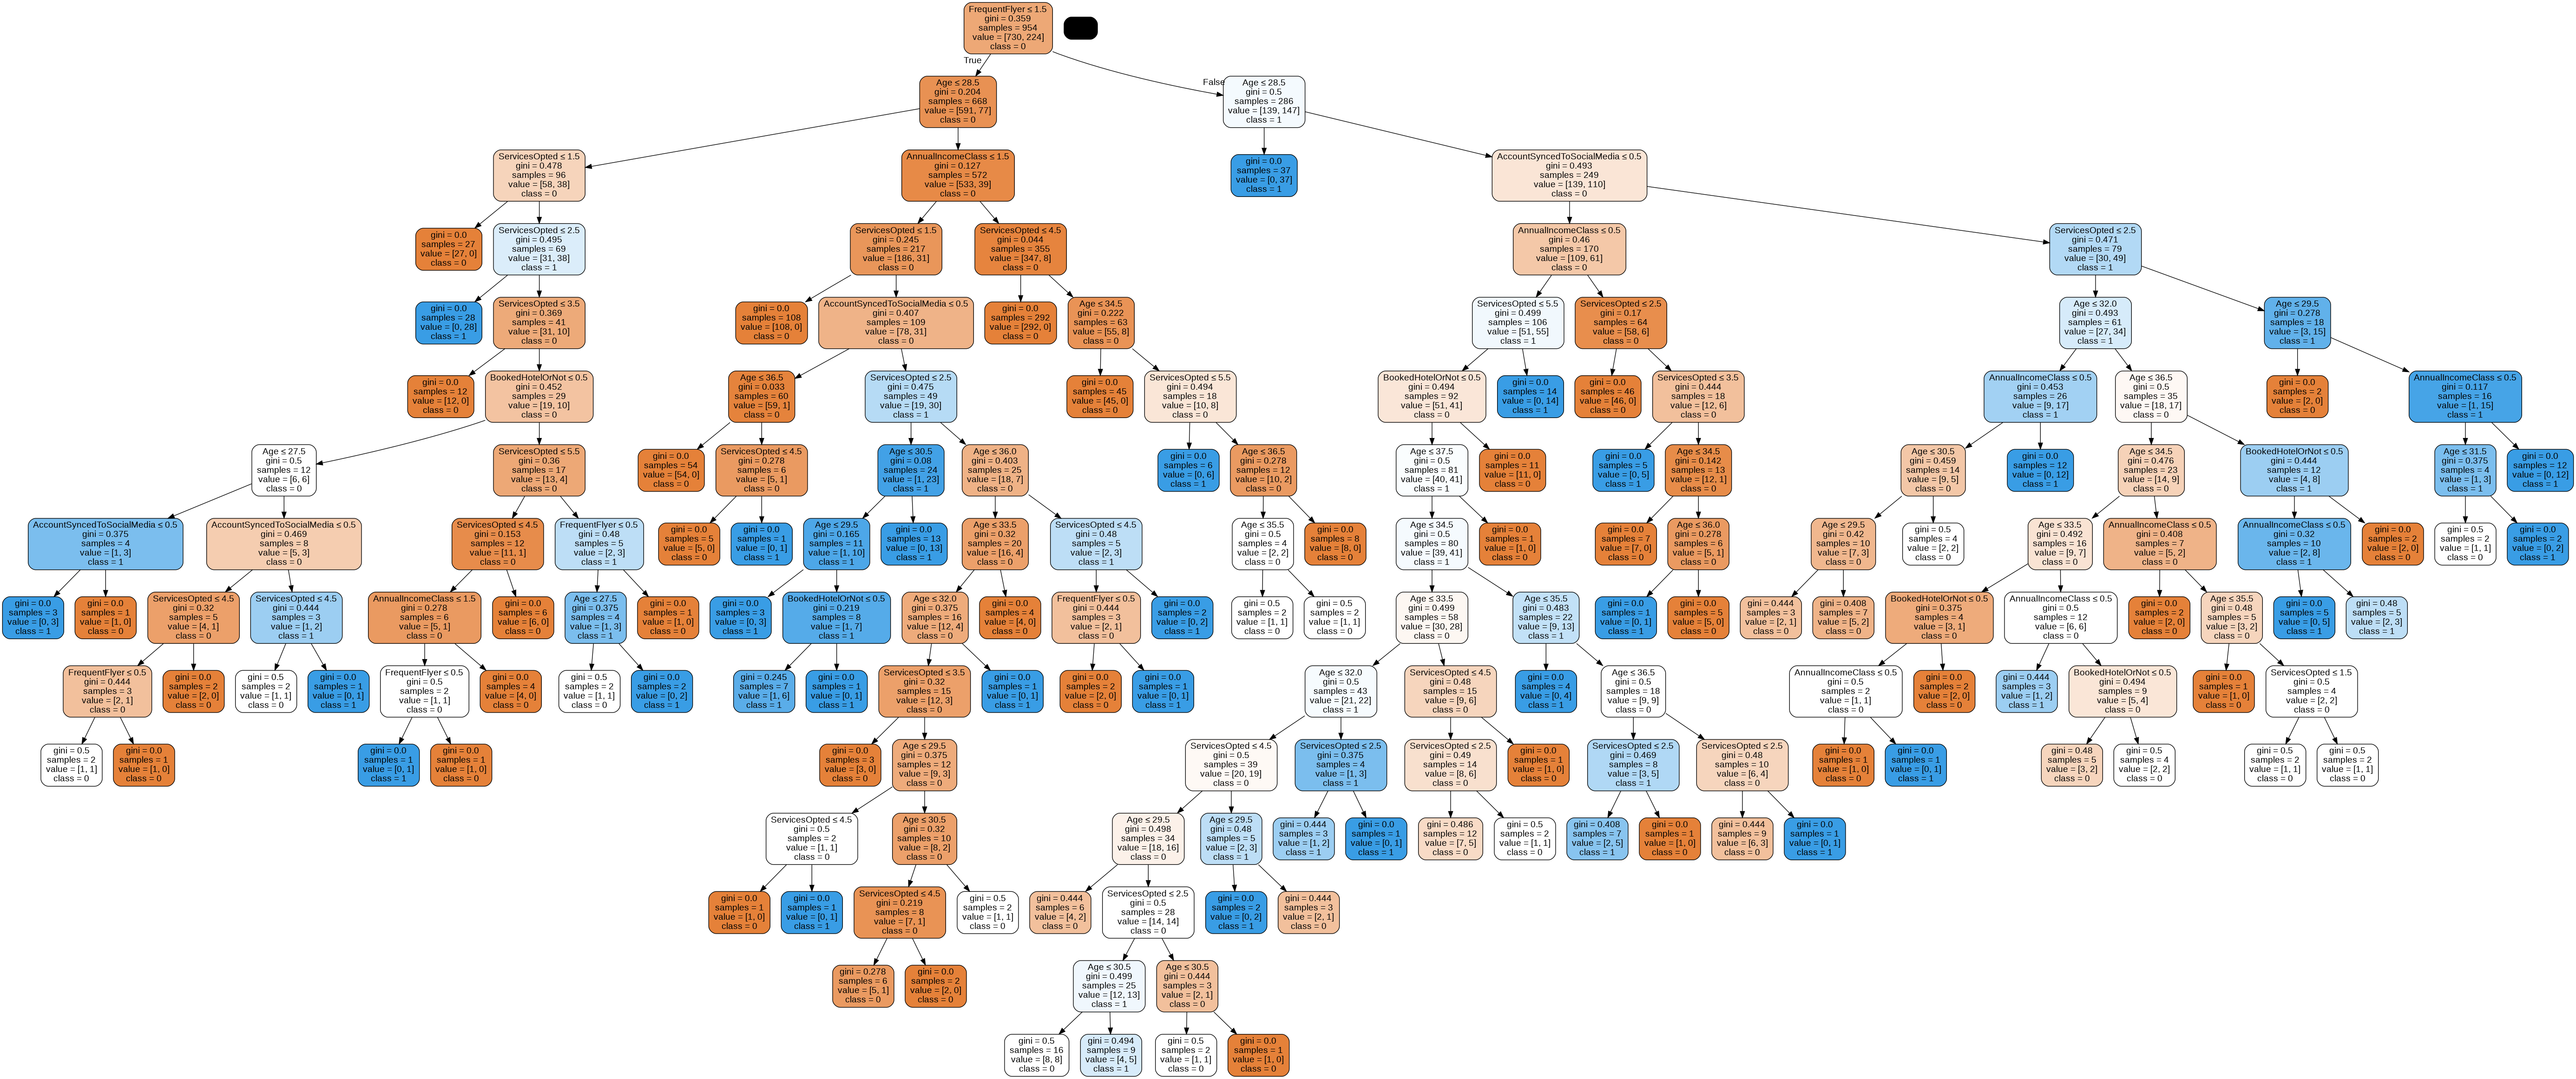

In [16]:
#menampilkan grafis decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
data_graph = export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, 
                             feature_names=atr_data.columns, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(data_graph)
graph.write_png('DecisionTreeC4.5.png')
Image(graph.create_png())